# E-tivity 3: Clustering and Manifold Learning

Use this notebook to complete Tasks 1 and 2 in E-tivity3.

### Import Python Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold
from sklearn import cluster
from sklearn import preprocessing
from sklearn.metrics import silhouette_score

### Task 1

- Download the dataset loans_dataset_et3.csv. This is a subset of the loans dataset used in the example notebooks for E-tivity1 and E-tivity2 which has only the examples with loan status Yes and preselected features. 
- Follow the examples in the notebook Lab 3 - Clustering and Manifold Learning.ipynb to cluster loans_dataset_et3.csv with the k-Means clustering algorithm and visualise the clustering. Use an appropriate feature-scaling technique and pick a value of k suggested by MDS and t-SNE visualisations of the dataset. Experiment with various values of the parameters of k-Means. Aim at producing a meaningful clustering that allows you to describe the clusters with words. Write a short conclusion about the characteristics of the clusters (max 250 words).

#### Load Data

In [2]:
data = pd.read_csv("loans_dataset_et3.csv")
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (332, 5)


In [3]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,332.000000,332.000000,332.000000,332.000000,332.000000
mean,5201.093373,1495.508795,140.882530,341.710843,0.978916
std,4584.815491,1982.742932,75.544237,61.651497,0.143882
min,645.000000,0.000000,17.000000,60.000000,0.000000
25%,2912.750000,0.000000,100.000000,360.000000,1.000000
50%,3858.500000,1211.500000,128.000000,360.000000,1.000000
75%,5818.250000,2250.000000,162.000000,360.000000,1.000000
max,39999.000000,20000.000000,600.000000,480.000000,1.000000


In [4]:
# All fields are numerical so we can scale this data.

#### Scale Data

In [5]:
# Basic scalar from lab
min_max_scaler = preprocessing.MinMaxScaler()
min_max_data = min_max_scaler.fit_transform(data)
min_max_dataframe = pd.DataFrame(min_max_data, columns=data.columns)


/Users/cathalc/.pyenv/versions/3.5.6/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Ref to scaling data that contains outliers https://scikit-learn.org/stable/modules/preprocessing.html#scaling-data-with-outliers

In [6]:
# Scalar to scale data that contains outliers
robust_scaler = preprocessing.RobustScaler()
robust_data = robust_scaler.fit_transform(data)
robust_df = pd.DataFrame(robust_data, columns=data.columns)

In [7]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot

def clustering_scatterplot(points, labels, centers, title):
    # plot the examples, i.e. the data points
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

Number of clusters  𝑘 .

In [8]:
k = 3

In [9]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(robust_data)

In [10]:
# Apply manifold-learning technique to project 
# append the cluster centers to the dataset
robust_data_and_centers = np.r_[robust_data, clustered_data_sklearn.cluster_centers_]

In [11]:
# Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space

In [12]:
# project both the data and the k-Means cluster centers to a 2D space
XYcoordinates = manifold.MDS(n_components=2).fit_transform(robust_data_and_centers)
print("transformation complete")

transformation complete


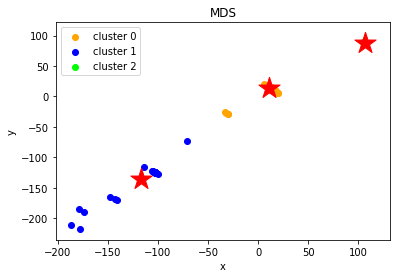

In [13]:
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

In [14]:
# Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

In [15]:
# project both th data and the k-Means cluster centers to a 2D space
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(robust_data_and_centers)
print("transformation complete")

transformation complete


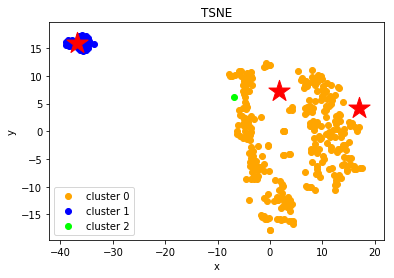

In [16]:
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

In [17]:
# Cluster analysis
data['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=data.index)
data.mean()

ApplicantIncome      5201.093373
CoapplicantIncome    1495.508795
LoanAmount            140.882530
Loan_Amount_Term      341.710843
Credit_History          0.978916
cluster                 0.120482
dtype: float64

In [18]:
data.tail()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,cluster
327,5417,4196.0,267,360,1,0
328,16666,0.0,275,360,1,0
329,10750,0.0,312,360,1,0
330,5955,5625.0,315,360,1,0
331,6133,3906.0,324,360,1,0


Compute the mean value of each attribute for each cluster

In [19]:
data.groupby('cluster').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
cluster,,,,,
0,5142.712838,1510.868649,142.398649,359.189189,0.983108
1,6152.843750,1293.118750,130.625000,162.750000,0.937500
2,1907.250000,1978.000000,110.750000,480.000000,1.000000


- group 0 main applicant has a below average income, the coapplicant has an above average income. they are seeking an above average loan.

- group 1 main applicant has an above average income, the coapplicant has a below average income. they are seeking a below average loan.

- group 2 both main and coapplicant have below average income, the coapplicant has an above average income. they are seeking a below average loan over a longer period of time than all other clustered loan applications on avergae.

### Task 2

- Plot the sum of squared distances from the data points (in loans_dataset_et3.csv) to the centers of the k-Means clusters for various values of k. Use the Elbow method to pick the best value of k. Attempt also another method for determining the best value of k. If these methods suggest a different value of k (from the one you used in Task 1), then compute a new k-Means clustering.
- Use another clustering algorithm (from the ones available in scikit-learn) for the same dataset and an appropriate manifold-learning technique to visualise it.
- Discuss the differences between the k-Means clustering and the clustering found by the second algorithm you have tried in words (max 250 words) and by visualising the clusterings with an appropriate manifold-learning technique.

In [20]:
sse = {}
sil = {}

for k in range(2,20):
    kmeans = cluster.KMeans(n_clusters=k, max_iter=1000).fit(robust_data)
    label = kmeans.labels_
    sil_coeff = silhouette_score(data, label, metric='euclidean')
    sil[k] = sil_coeff
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

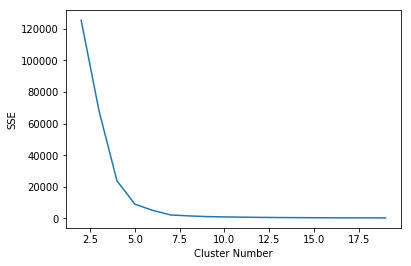

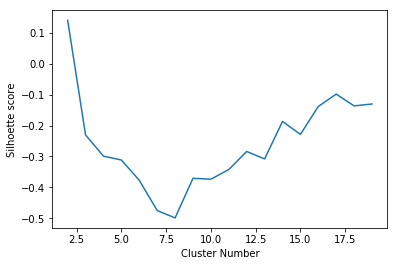

In [21]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Cluster Number")
plt.ylabel("SSE")
plt.show()


plt.figure()
plt.plot(list(sil.keys()), list(sil.values()))
plt.xlabel("Cluster Number")
plt.ylabel("Silhoette score")
plt.show()

transformation complete


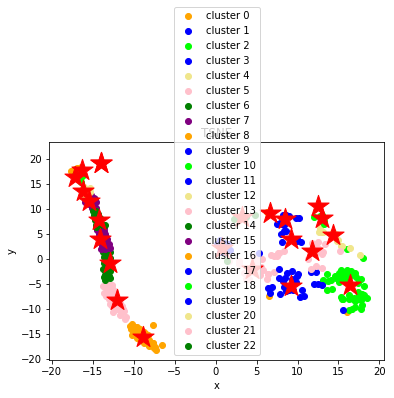

In [34]:
from sklearn.cluster import AffinityPropagation

af = AffinityPropagation().fit(data)
cluster_centers = af.cluster_centers_
cluster_centers_indices = af.cluster_centers_indices_
n_clusters = len(cluster_centers_indices)

# append the cluster centers to the dataset
data_and_centers = np.r_[data, cluster_centers]

# project both the data and the cluster centers to a 2D space
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

clustering_scatterplot(points=XYcoordinates[:-n_clusters,:], 
                       labels=af.labels_, 
                       centers=XYcoordinates[-n_clusters:,:], 
                       title='TSNE')

Differences between k-Means clustering and second algorithm, AffinityPropagation 

- Both algorithms are suited to different applications. 
- K means seems to be good when you know the number of classifications you're trying to sort your data into,
- AffinityPropagation chooses the number of clusters based on the data itself and grows dynamically as we can see on the figure above. 

K means requires a set number and AffinityPropagation does not!

Ref: https://www.quora.com/What-is-the-difference-between-k-means-and-affinity-propagation-clustering-techniques-In-what-scenarios-are-both-of-them-used
        